In [9]:
import numpy as np
import pandas as pd
import scipy as sp
from sklearn import *
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv(r"C:\Users\abhis\Desktop\ObesityDataSet_raw_and_data_sinthetic.csv")

In [11]:
print(df.head(10))

   Gender   Age  Height  Weight Family_hist High_Cl  Veg  Main_meals  \
0  Female  21.0    1.62    64.0         yes      no  2.0         3.0   
1  Female  21.0    1.52    56.0         yes      no  3.0         3.0   
2    Male  23.0    1.80    77.0         yes      no  2.0         3.0   
3    Male  27.0    1.80    87.0          no      no  3.0         3.0   
4    Male  22.0    1.78    89.8          no      no  2.0         1.0   
5    Male  29.0    1.62    53.0          no     yes  2.0         3.0   
6  Female  23.0    1.50    55.0         yes     yes  3.0         3.0   
7    Male  22.0    1.64    53.0          no      no  2.0         3.0   
8    Male  24.0    1.78    64.0         yes     yes  3.0         3.0   
9    Male  22.0    1.72    68.0         yes     yes  2.0         3.0   

   Meals_btw Smoking  Water_int  Physical_Act     Alcohol  \
0  Sometimes      no        2.0           0.0          no   
1  Sometimes     yes        3.0           3.0   Sometimes   
2  Sometimes      no    

In [15]:
# Check for null values in the entire DataFrame
null_values = df.isnull().sum()

# Display the count of null values for each column
print("Null Values in Each Column:")
print(null_values)

# Check if there are any null values in the entire DataFrame
any_null_values = df.isnull().any().any()

if any_null_values:
    print("\nThere are null values in the DataFrame.")
else:
    print("\nThere are no null values in the DataFrame.")

Null Values in Each Column:
Gender          0
Age             0
Height          0
Weight          0
Family_hist     0
High_Cl         0
Veg             0
Main_meals      0
Meals_btw       0
Smoking         0
Water_int       0
Physical_Act    0
Alcohol         0
M_Trans         0
OB_Level        0
dtype: int64

There are no null values in the DataFrame.


In [12]:
column_names = df.columns
print(column_names)

Index(['Gender', 'Age', 'Height', 'Weight', 'Family_hist', 'High_Cl', 'Veg',
       'Main_meals', 'Meals_btw', 'Smoking', 'Water_int', 'Physical_Act',
       'Alcohol', 'M_Trans', 'OB_Level'],
      dtype='object')


In [14]:
# Display basic statistics for numerical features
numerical_stats = df.describe()
print(numerical_stats)

# Calculate skewness and kurtosis for each numerical feature
skewness = df.skew()
kurtosis = df.kurtosis()

# Display skewness and kurtosis
print("\nSkewness:")
print(skewness)
print("\nKurtosis:")
print(kurtosis)

               Age       Height       Weight          Veg   Main_meals  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

         Water_int  Physical_Act  
count  2111.000000   2111.000000  
mean      2.008011      1.010298  
std       0.612953      0.850592  
min       1.000000      0.000000  
25%       1.584812      0.124505  
50%       2.000000      1.000000  
75%       2.477420      1.666678  
max       3.000000      3.000000  

Skewness:
Age    

C:\Users\abhis\AppData\Local\Temp\ipykernel_28640\817641991.py:6: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = df.skew()
C:\Users\abhis\AppData\Local\Temp\ipykernel_28640\817641991.py:7: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  kurtosis = df.kurtosis()


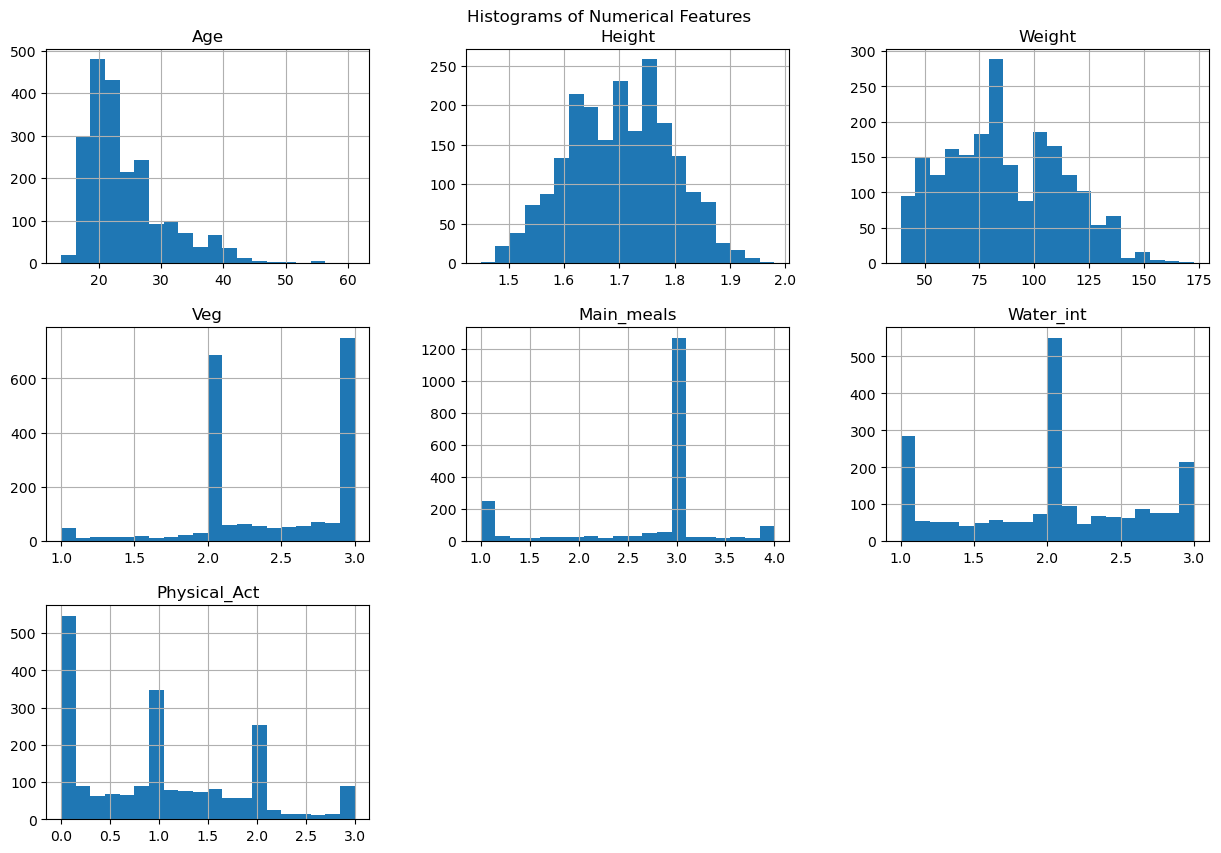

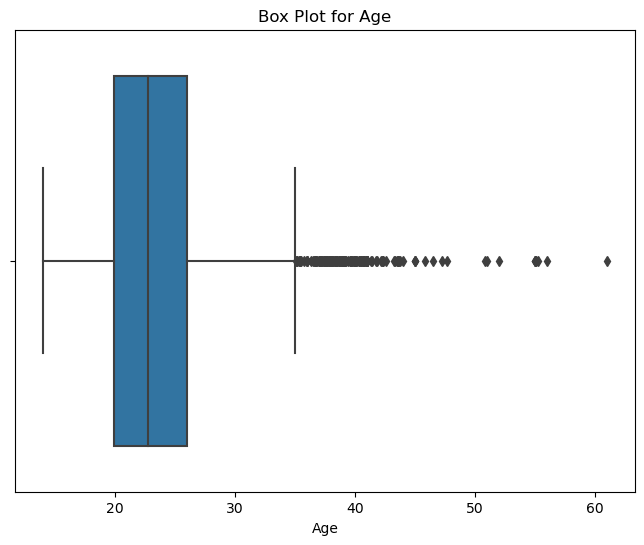

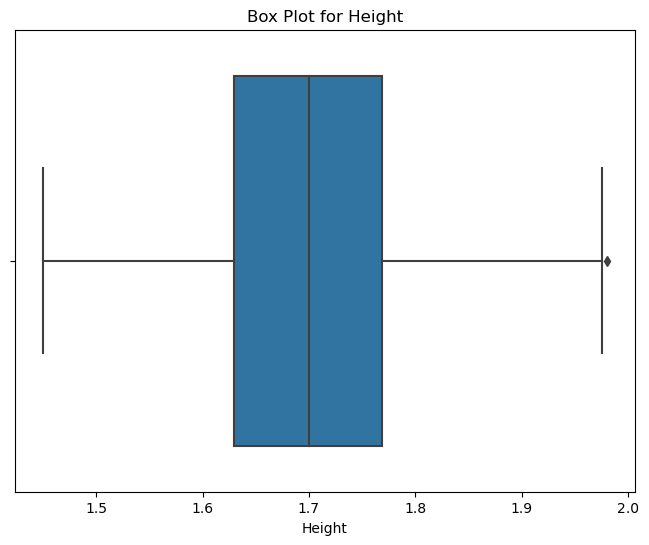

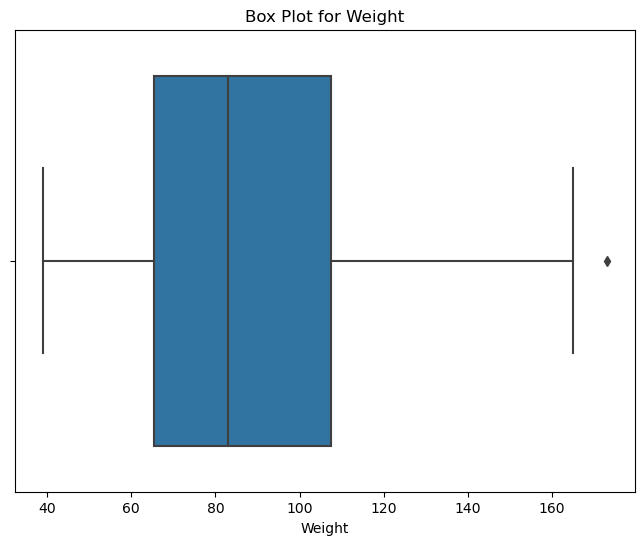

C:\Users\abhis\AppData\Local\Temp\ipykernel_28640\2284264397.py:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


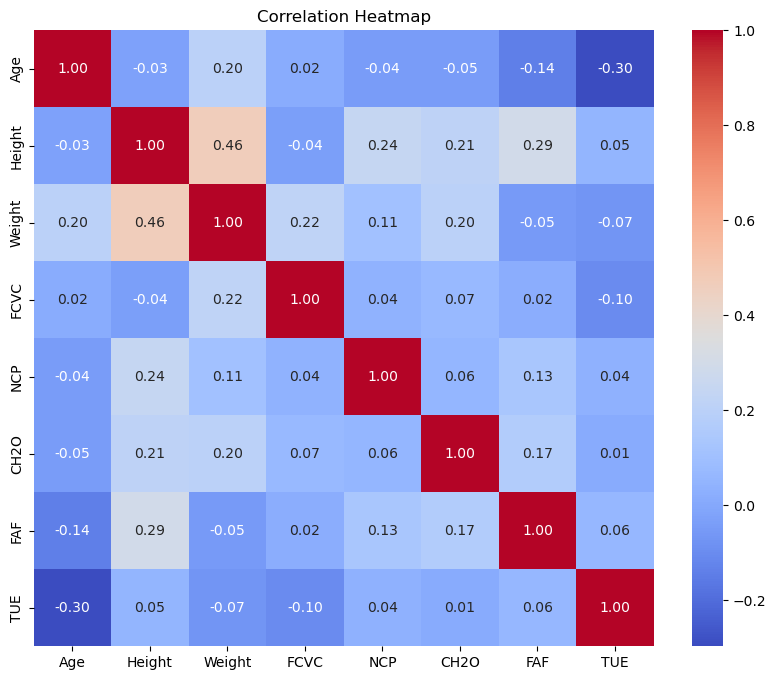

In [19]:
# Visualize distribution of numerical features using histograms
df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Features", y=0.92)
plt.show()

# Box plots for selected features
selected_features = ['Age', 'Height', 'Weight']
for feature in selected_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[feature])
    plt.title(f"Box Plot for {feature}")
    plt.show()

# Correlation heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [11]:
from scipy.spatial.distance import pdist, squareform

# Calculate pairwise Euclidean distances
euclidean_distances = pd.DataFrame(squareform(pdist(data.select_dtypes(include='number'))), columns=data.index, index=data.index)
print("Pairwise Euclidean Distances:")
print(euclidean_distances)

Pairwise Euclidean Distances:
           0          1          2          3          4          5     \
0      0.000000   8.718371  13.305352  23.896284  25.916512  13.638182   
1      8.718371   0.000000  21.191470  31.608201  34.036856   9.165697   
2     13.305352  21.191470   0.000000  10.862780  13.184855  24.840137   
3     23.896284  31.608201  10.862780   0.000000   6.468416  34.132571   
4     25.916512  34.036856  13.184855   6.468416   0.000000  37.513539   
...         ...        ...        ...        ...        ...        ...   
2106  67.437460  75.436557  54.457107  44.826373  41.725608  78.847838   
2107  69.771203  77.775854  56.766126  47.019880  44.024334  81.066867   
2108  69.728574  77.729267  56.704344  46.911575  43.976940  80.970042   
2109  69.451198  77.444702  56.386536  46.441202  43.695055  80.501404   
2110  69.544544  77.547290  56.501150  46.615853  43.787918  80.669912   

           6          7          8          9     ...       2101       2102  \
0 

In [14]:
# Count the number of null values in each column
null_values = data.isnull().sum()

# Print the number of null values in each column
print(null_values)

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [20]:
# Select categorical variables only
categorical_columns = df.select_dtypes(include=['object'])
categorical_column_names = categorical_columns.columns
# Print the categorical columns
print(categorical_column_names)


Index(['Gender', 'Family_hist', 'High_Cl', 'Meals_btw', 'Smoking', 'Alcohol',
       'M_Trans', 'OB_Level'],
      dtype='object')


In [21]:
from scipy.stats import chi2_contingency
categorical_features = ['Gender', 'Family_hist', 'High_Cl', 'Meals_btw', 'Smoking', 'Alcohol',
       'M_Trans', 'OB_Level']

In [24]:
# Chi-square test for each categorical feature against the target variable
target_variable = 'OB_Level'

for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df[target_variable])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    print(f"Chi-square test for {feature} vs {target_variable}:")
    print(f"Chi2 Value: {chi2}")
    print(f"P-Value: {p}")
    
    if p < 0.05:
        print(f"The feature {feature} is statistically significant for {target_variable}.\n")
    else:
        print(f"The feature {feature} is not statistically significant for {target_variable}.\n")

Chi-square test for Gender vs OB_Level:
Chi2 Value: 657.746227342968
P-Value: 8.088897293329991e-139
The feature Gender is statistically significant for OB_Level.

Chi-square test for Family_hist vs OB_Level:
Chi2 Value: 621.9794353945297
P-Value: 4.2280167944705074e-131
The feature Family_hist is statistically significant for OB_Level.

Chi-square test for High_Cl vs OB_Level:
Chi2 Value: 233.34130356133423
P-Value: 1.4822362082358762e-47
The feature High_Cl is statistically significant for OB_Level.

Chi-square test for Meals_btw vs OB_Level:
Chi2 Value: 802.9772817566468
P-Value: 7.383852893286775e-159
The feature Meals_btw is statistically significant for OB_Level.

Chi-square test for Smoking vs OB_Level:
Chi2 Value: 32.13783205600177
P-Value: 1.5354243135096318e-05
The feature Smoking is statistically significant for OB_Level.

Chi-square test for Alcohol vs OB_Level:
Chi2 Value: 338.5775202939282
P-Value: 5.287157877798017e-61
The feature Alcohol is statistically significant for

In [25]:
# Select numeric variables only
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
numeric_column_names = numeric_columns.columns
# Print the categorical columns
print(numeric_column_names)

Index(['Age', 'Height', 'Weight', 'Veg', 'Main_meals', 'Water_int',
       'Physical_Act'],
      dtype='object')


In [27]:
#information gain for feature selection
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

# Encode the target variable if it's not already numeric
label_encoder = LabelEncoder()
df['OB_Level'] = label_encoder.fit_transform(df['OB_Level'])

# Select features (both categorical and numerical)
selected_features = ['Age', 'Height', 'Weight', 'Veg', 'Main_meals', 'Water_int',
       'Physical_Act']

# Calculate Information Gain for each feature
information_gain = mutual_info_classif(df[selected_features], df['OB_Level'], discrete_features='auto')

# Create a DataFrame to display the results
information_gain_df = pd.DataFrame({'Feature': selected_features, 'Information Gain': information_gain})
information_gain_df = information_gain_df.sort_values(by='Information Gain', ascending=False)

# Display the results
print(information_gain_df)

        Feature  Information Gain
2        Weight          1.248955
0           Age          0.593613
1        Height          0.421742
3           Veg          0.393483
6  Physical_Act          0.308275
5     Water_int          0.301573
4    Main_meals          0.259435


In [28]:
from sklearn.preprocessing import LabelEncoder

df = data


# Select the column(s) you want to label encode
columns_to_encode = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Label encode each selected column
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# Display the updated DataFrame
print(df)

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Label encode each selected column
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# Display the updated DataFrame
print(df)

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Label encode each selected column
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# Display the updated DataFrame
print(df)

      Gender        Age    Height      Weight  family_history_with_overweight  \
0          0  21.000000  1.620000   64.000000                               1   
1          0  21.000000  1.520000   56.000000                               1   
2          1  23.000000  1.800000   77.000000                               1   
3          1  27.000000  1.800000   87.000000                               0   
4          1  22.000000  1.780000   89.800000                               0   
...      ...        ...       ...         ...                             ...   
2106       0  20.976842  1.710730  131.408528                               1   
2107       0  21.982942  1.748584  133.742943                               1   
2108       0  22.524036  1.752206  133.689352                               1   
2109       0  24.361936  1.739450  133.346641                               1   
2110       0  23.664709  1.738836  133.472641                               1   

      FAVC  FCVC  NCP  CAEC

In [29]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode the target variable if it's not already numeric
label_encoder = LabelEncoder()
df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])

# Define features and target
X = df.drop('NObeyesdad', axis=1)  # Features
y = df['NObeyesdad']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
# Create a logistic regression model (you can replace this with another classifier)
model = LogisticRegression()

# Create RFE model
rfe = RFE(model, n_features_to_select=5)  # Set the desired number of features

# Fit RFE
fit = rfe.fit(X_train, y_train)

# Display the ranking of features
print("Feature Ranking:")
print(fit.ranking_)

# Display the selected features
selected_features = X_train.columns[fit.support_]
print("\nSelected Features:")
print(selected_features)

C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Feature Ranking:
[ 1 11  1 10  1  2  1  5  1 12  6  3  9  8  4  7]

Selected Features:
Index(['Gender', 'Height', 'family_history_with_overweight', 'FCVC', 'CAEC'], dtype='object')


C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [31]:
pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/73/da/d5d77a9a7a135c948dbf8d3b873655b105a152d69e590150c83d23c3d070/mlxtend-0.23.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------------ --------------------------- 0.5/1.4 MB 7.4 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 11.5 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 10.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import LabelEncoder

# Assuming 'Obesity Level' is your target variable
label_encoder = LabelEncoder()
df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])

# Define features and target
X = df.drop('NObeyesdad', axis=1)  # Features
y = df['NObeyesdad']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a classifier (you can replace it with another classifier)
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize SequentialFeatureSelector
sfs = SequentialFeatureSelector(clf, k_features='best', forward=True, scoring=mutual_info_classif, cv=5)

# Fit SFS
sfs.fit(X_train, y_train)

# Print selected features
print("Selected Features:", sfs.k_feature_names_)

C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 140, in __call__
    score = scorer(estimator, *args, **routed_params.get(name).score)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 189, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\abhis\anaconda3\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\abhis\anaconda3\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
C:\Users\abhis\anaconda3\Lib\

Selected Features: ('Gender',)


C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 140, in __call__
    score = scorer(estimator, *args, **routed_params.get(name).score)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py", line 189, in wrapper
    params = func_sig.bind(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\abhis\anaconda3\Lib\inspect.py", line 3212, in bind
    return self._bind(args, kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\abhis\anaconda3\Lib\inspect.py", line 3138, in _bind
    raise TypeError(
TypeError: too many positional arguments

  warnings.warn(
C:\Users\abhis\anaconda3\Lib\

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd


# Assuming 'Obesity Level' is your target variable
label_encoder = LabelEncoder()
df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])

# Define features and target
X = df.drop('NObeyesdad', axis=1)  # Features
y = df['NObeyesdad']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
rf_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.2f}")

Accuracy on the test set: 0.96


In [36]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/bc/43/242432efc3f60052a4a534dc4926b21e236ab4ec8d4920c593da3f65c65d/xgboost-2.0.2-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/99.8 MB 5.2 MB/s eta 0:00:20
   ---------------------------------------- 0.8/99.8 MB 8.2 MB/s eta 0:00:13
   ---------------------------------------- 1.0/99.8 MB 8.3 MB/s eta 0:00:12
    --------------------------------------- 1.3/99.8 MB 7.1 MB/s eta 0:00:14
    --------------------------------------- 2.0/99.8 MB 8.3 MB/s eta 0:00:12
    --------------------------------------- 2.2/99.8 MB 8.4 MB/s eta 0:00:12
   - -------------------------------------- 3.0/99.8 MB 9.2 MB/s eta 0:00:11
   - -------------------------------------- 3.1/99.8 MB 9.6 MB/s eta 0:00:11
   - -------------------------------------- 3.7/99.8 MB 8.7 MB/s eta 0:00:12
   - ---------------------------

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier



# Assuming 'Obesity Level' is your target variable
label_encoder = LabelEncoder()
df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])

# Define features and target
X = df.drop('NObeyesdad', axis=1)  # Features
y = df['NObeyesdad']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBClassifier
xgb_classifier = XGBClassifier(objective='multi:softmax', num_class=len(df['NObeyesdad'].unique()), random_state=42)

# Train the model on the training set
xgb_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.2f}")

Accuracy on the test set: 0.96


In [40]:
from sklearn.linear_model import LogisticRegression

# Initialize the LogisticRegression model
logreg_classifier = LogisticRegression(max_iter=1000, random_state=42)  
# You can adjust parameters like max_iter

# Train the model on the training set
logreg_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred_logreg = logreg_classifier.predict(X_test)

# Evaluate the Logistic Regression model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Accuracy of Logistic Regression on the test set: {accuracy_logreg:.2f}")

Accuracy of Logistic Regression on the test set: 0.80


C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

# Assuming 'Obesity Level' is your target variable
label_encoder = LabelEncoder()
df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])

# Define features and target
X = df.drop('NObeyesdad', axis=1)  # Features
y = df['NObeyesdad']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for Ridge Regression
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features for Ridge
    ('ridge', Ridge(alpha=1.0))  # You can adjust the regularization strength (alpha)
])

# Train the Ridge model on the training set
ridge_pipeline.fit(X_train, y_train)

# Predictions on the test set
y_pred_ridge = ridge_pipeline.predict(X_test)

# Evaluate the Ridge model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Mean Squared Error for Ridge Regression: {mse_ridge:.2f}")

# Create a pipeline for Lasso Regression
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features for Lasso
    ('lasso', Lasso(alpha=1.0))  # You can adjust the regularization strength (alpha)
])

# Train the Lasso model on the training set
lasso_pipeline.fit(X_train, y_train)

# Predictions on the test set
y_pred_lasso = lasso_pipeline.predict(X_test)

# Evaluate the Lasso model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f"Mean Squared Error for Lasso Regression: {mse_lasso:.2f}")

Mean Squared Error for Ridge Regression: 2.72
Mean Squared Error for Lasso Regression: 3.72


In [42]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Assuming 'Obesity Level' is your target variable
label_encoder = LabelEncoder()
df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])

# Select relevant columns for association rule mining
columns_for_apriori = ['family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS']

# Convert categorical columns to string type
for column in columns_for_apriori:
    df[column] = df[column].astype(str)

# Apply one-hot encoding for Apriori
df_apriori = pd.get_dummies(df[columns_for_apriori])

# Apply Apriori algorithm
frequent_itemsets = apriori(df_apriori, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display the association rules
print("Association Rules:")
print(rules)

Association Rules:
                             antecedents  \
0     (family_history_with_overweight_0)   
1     (family_history_with_overweight_0)   
2     (family_history_with_overweight_0)   
3     (family_history_with_overweight_0)   
4     (family_history_with_overweight_0)   
...                                  ...   
3124           (MTRANS_3, SCC_0, CALC_3)   
3125          (MTRANS_3, CALC_3, FAVC_1)   
3126             (FAVC_1, SCC_0, CALC_3)   
3127                    (CAEC_2, CALC_3)   
3128                  (MTRANS_3, CALC_3)   

                                            consequents  antecedent support  \
0                                              (FAVC_1)            0.182378   
1                                              (CAEC_2)            0.182378   
2                                             (SMOKE_0)            0.182378   
3                                               (SCC_0)            0.182378   
4                                              (CALC_2)  

C:\Users\abhis\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Silhouette Score for K-Means: 0.33
Silhouette Score for Hierarchical Clustering: 0.31


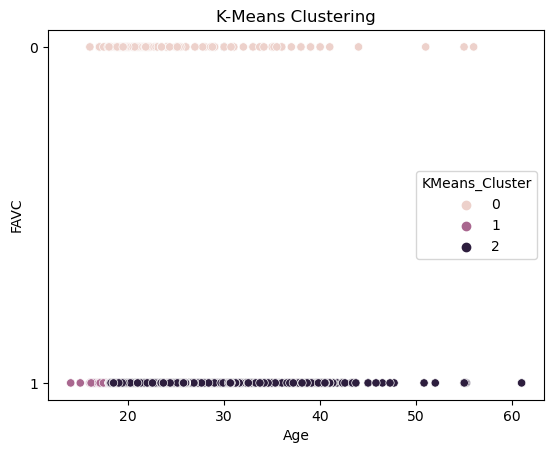

In [44]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


# Assuming 'Obesity Level' is your target variable
label_encoder = LabelEncoder()
df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])

# Select relevant features for clustering
features_for_clustering = ['Age', 'Height', 'Weight', 'FAVC']

# Extract features for clustering
X_clustering = df[features_for_clustering]

# Standardize features
scaler = StandardScaler()
X_clustering_scaled = scaler.fit_transform(X_clustering)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_clustering_scaled)

# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
df['Hierarchical_Cluster'] = hierarchical.fit_predict(X_clustering_scaled)

# Evaluate clustering validity using Silhouette Score
silhouette_kmeans = silhouette_score(X_clustering_scaled, df['KMeans_Cluster'])
silhouette_hierarchical = silhouette_score(X_clustering_scaled, df['Hierarchical_Cluster'])

print(f"Silhouette Score for K-Means: {silhouette_kmeans:.2f}")
print(f"Silhouette Score for Hierarchical Clustering: {silhouette_hierarchical:.2f}")

# Visualize clusters (example for K-Means)
sns.scatterplot(x='Age', y='FAVC', hue='KMeans_Cluster', data=df)
plt.title('K-Means Clustering')
plt.show()

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Assuming 'Obesity Level' is your target variable
label_encoder = LabelEncoder()
df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])

# Select relevant features for classification
features_for_classification = ['Age', 'Height', 'Weight', 'FAVC']

# Extract features for classification
X_classification = df[features_for_classification]
y_classification = df['NObeyesdad']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

# Naïve Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)

# Evaluate classification models
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')

accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')

print("Decision Tree Metrics:")
print(f"Accuracy: {accuracy_dt:.2f}")
print(f"Precision: {precision_dt:.2f}")
print(f"Recall: {recall_dt:.2f}")

print("\nNaïve Bayes Metrics:")
print(f"Accuracy: {accuracy_nb:.2f}")
print(f"Precision: {precision_nb:.2f}")
print(f"Recall: {recall_nb:.2f}")

# Visualize Decision Tree (example)
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 6))
plot_tree(dt_classifier, feature_names=features_for_classification, class_names=class_names, filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

Decision Tree Metrics:
Accuracy: 0.94
Precision: 0.94
Recall: 0.94

Naïve Bayes Metrics:
Accuracy: 0.57
Precision: 0.56
Recall: 0.57


NameError: name 'class_names' is not defined

<Figure size 1000x600 with 0 Axes>